In [4]:
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector
from IPython.display import display
from qiskit.tools.visualization import plot_histogram

sim = Aer.get_backend("aer_simulator")

# Q1  13の2進数表示(5桁)を文字列で表示せよ(右端を最小桁とする)、また左から3桁目のビットを反転した際は10進数でいくつになるか？ 任意の数について同様の計算を行う関数を作成せよ。

## 解答

In [5]:
# 13の2進数表記
binary_13 = f"{13:05b}"
print(binary_13)

new_binary = binary_13[:2] + ("0" if binary_13[2] == "1" else "1") + binary_13[3:]
print(new_binary)


def flip_3rd_digid(integer):
    binary = f"{integer:05b}"
    new_binary = binary[:2] + ("0" if binary[2] == "1" else "1") + binary[3:]
    return new_binary

01101
01001


# Q2 Qiskit Textbookおよびドキュメントを参照し以下の回路を作成せよ。

<img src="https://user-images.githubusercontent.com/19603134/225393953-4c85f438-16fa-41fe-b1d7-5522d52e5957.png">

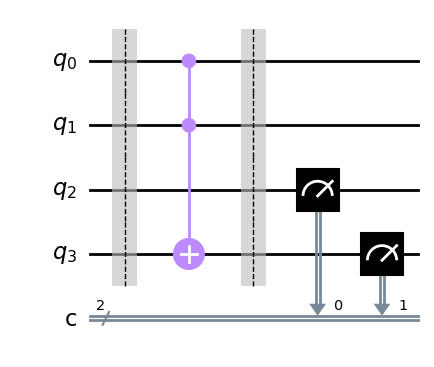

In [6]:
qc = QuantumCircuit(4, 2)  # A QuantumCircuit with 4 qubits and 2 classical bits``
# Xゲートを配置せよ
# <write your code>
qc.barrier()
# CNOTゲートを配置せよ
# <write your code>
qc.ccx(0, 1, 3)
qc.barrier()
qc.measure([2, 3], [0, 1])
qc.draw(output="mpl")

## 解答

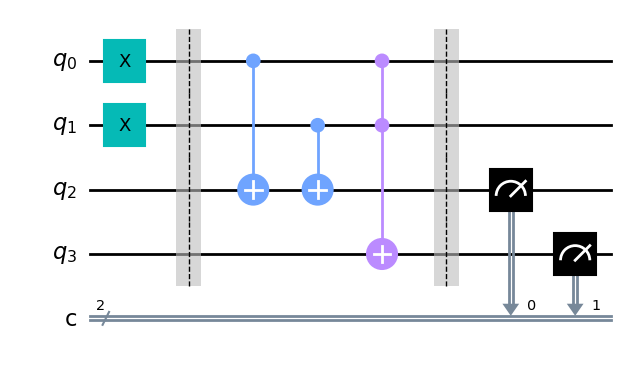

In [7]:
qc = QuantumCircuit(4, 2)  # A QuantumCircuit with 4 qubits and 2 classical bits``
# Xゲートを配置せよ
qc.x([0, 1])
qc.barrier()
# CNOTゲートを配置せよ
qc.cx(0, 2)
qc.cx(1, 2)
qc.ccx(0, 1, 3)
qc.barrier()
qc.measure([2, 3], [0, 1])
qc.draw(output="mpl")


# Q3 以下のブロッホ球に対応する量子状態を生成する回路を作成せよ。


<img src="https://user-images.githubusercontent.com/19603134/225397694-8c00ee9b-d09c-4180-abe1-1d091a0582ff.png" width="400">

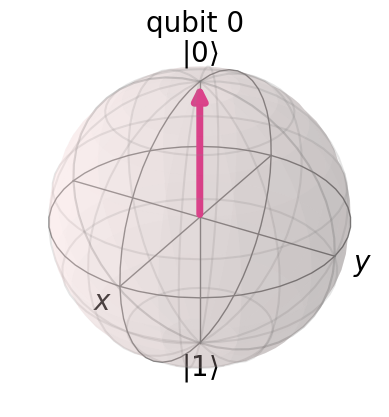

In [8]:
qc = QuantumCircuit(1)  # A QuantumCircuit with 1 qubits
# 適切なゲートを配置せよ
# <write your code >
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

## 解答

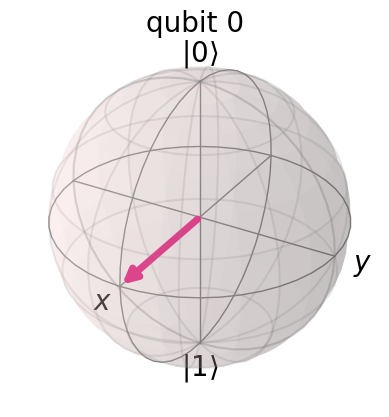

In [9]:
qc = QuantumCircuit(1)  # A QuantumCircuit with 1 qubits
# 適切なゲートを配置せよ
qc.h(0)
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)


# Q4 通常の測定(Z測定)では|+>状態と|->状態の区別をすることができない。この２つの状態を区別できる測定基底を作成せよ。



問題の位置を要検討 (|+>状態、|->状態の解説後が良さそう)

In [10]:
for state_label in ["+", "-"]:
    qc = QuantumCircuit(1,1)
    if state_label == "+":
        qc.initialize([1 / np.sqrt(2), 1 / np.sqrt(2)], 0)
    elif state_label == "-":
        qc.initialize([1 / np.sqrt(2), -1 / np.sqrt(2)], 0)
    qc.barrier()
    # 適切な測定基底をゲートを配置することで完成させよ
    # <write your code>
    qc.measure(0,0)
    counts = sim.run(qc).result().get_counts()
    print(f"|{state_label}> : ", "counts=",counts)
    qc.draw(output="mpl")

|+> :  counts= {'0': 496, '1': 528}
|-> :  counts= {'1': 505, '0': 519}


## 解答

In [11]:
for state_label in ["+", "-"]:
    qc = QuantumCircuit(1,1)
    if state_label == "+":
        qc.initialize([1 / np.sqrt(2), 1 / np.sqrt(2)], 0)
    elif state_label == "-":
        qc.initialize([1 / np.sqrt(2), -1 / np.sqrt(2)], 0)
    qc.barrier()
    # 適切な測定基底をゲートを配置することで完成させよ
    qc.h(0)
    qc.measure(0,0)
    counts = sim.run(qc).result().get_counts()
    print(f"|{state_label}> : ", "counts=",counts)
    qc.draw(output="mpl")

|+> :  counts= {'0': 1024}
|-> :  counts= {'1': 1024}


## 解説
まず、通常の測定(Z測定)では$|+\rangle$状態と$|-\rangle$状態の区別をすることができないことは、下記のように確認できる。
$|+\rangle$状態と$|-\rangle$状態を、通常の測定に採用されている基底状態、すなわち$Z$の固有状態を用いて展開すると
$$
|+\rangle = (|0\rangle+|1\rangle)/\sqrt{2},\ \ |-\rangle = (|0\rangle-|1\rangle)/\sqrt{2}
$$
と書くことができる。基底状態に掛かる係数の絶対値の二乗が、その基底状態の測定確率を表すことを思い出してほしい。$|+\rangle$状態を測定すると、$1/2$の確率で$|0\rangle$状態が、$1/2$の確率で$|1\rangle$状態が出力される。同様に$|-\rangle$状態を測定すると、$1/2$の確率で$|0\rangle$状態が、$1/2$の確率で$|1\rangle$状態が出力される。すなわち、$|+\rangle$と$|-\rangle$の両状態において、等確率で$|0\rangle$と$|1\rangle$の状態が測定の結果として得られる。このことから、一回のみの測定に限らず、無数に測定を行っても、両状態を区別できないことが分かる。

$|+\rangle$状態と$|-\rangle$状態は互いに直交するため、測定の基底を上手く選ぶことで一度の測定で区別することができる。ここでは、測定の基底そのものを変更するのではなく、測定の直前に測定対象の状態を操作することで、同じ効果を得るアプローチを示す。やや天下りにはなるが、測定の直前にアダマールゲートを実行すればよい。$|+\rangle$状態と$|-\rangle$状態はそれぞれ
$$
H |+\rangle = |0\rangle, \ \ H |-\rangle = |1\rangle
$$
となり、元々$|+\rangle$であった状態からは100%の確率で$|0\rangle$が出力されて、元々$|-\rangle$であった状態からは100%の確率で$|1\rangle$が出力されることが分かる。

## 参考資料
- Pages 22, 56-57 and 84-87 in Nielsen, M., & Chuang, I. (2010). Quantum Computation and Quantum Information: 10th Anniversary Edition. Cambridge: Cambridge University Press. doi:10.1017/CBO9780511976667


# Q5 以下の表を埋め、それぞれ回路を作成し測定により結果を確かめよ。<br>       (例: 1行1列目ではX|0>の演算結果を求める)

問題の位置を要検討 (ゲート作成演習の総仕上げ的位置が良さそう)

<img src="https://user-images.githubusercontent.com/19603134/225401162-7f343dd9-0054-4e6a-a483-514a96806b8d.png">

## 解答

<img src="https://user-images.githubusercontent.com/19603134/225403944-6ec818f1-3336-423d-bb0c-bc780bffe38b.png">

In [12]:

for state_label in ["0", "1", "+", "-"]:
    for gate_label in ["X", "Z", "H", "ZH"]:
        qc = QuantumCircuit(1, 1)

        # 初期状態の設定
        if state_label == "1":
            qc.initialize([0, 1], 0)
        elif state_label == "+":
            qc.initialize([1 / np.sqrt(2), 1 / np.sqrt(2)], 0)
        elif state_label == "-":
            qc.initialize([1 / np.sqrt(2), -1 / np.sqrt(2)], 0)

        # ゲートの配置
        if gate_label =="X":
            qc.x(0)
        elif gate_label =="Z":
            qc.z(0)
        elif gate_label =="H":
            qc.h(0)
        elif gate_label =="ZH":
            qc.h(0)        
            qc.z(0)      
        # Statevectorは測定前に取得する必要がある
        state = Statevector.from_instruction(qc).data
        qc.measure(0, 0)
        counts = sim.run(qc).result().get_counts()
        print(f"{gate_label} |{state_label}> : ", "state=", state.round(3), "counts=",counts)
    print()

X |0> :  state= [0.+0.j 1.+0.j] counts= {'1': 1024}
Z |0> :  state= [1.+0.j 0.+0.j] counts= {'0': 1024}
H |0> :  state= [0.707+0.j 0.707+0.j] counts= {'1': 520, '0': 504}
ZH |0> :  state= [ 0.707+0.j -0.707+0.j] counts= {'1': 506, '0': 518}

X |1> :  state= [1.+0.j 0.+0.j] counts= {'0': 1024}
Z |1> :  state= [ 0.+0.j -1.+0.j] counts= {'1': 1024}
H |1> :  state= [ 0.707+0.j -0.707+0.j] counts= {'1': 501, '0': 523}
ZH |1> :  state= [0.707+0.j 0.707+0.j] counts= {'0': 489, '1': 535}

X |+> :  state= [0.707+0.j 0.707+0.j] counts= {'0': 472, '1': 552}
Z |+> :  state= [ 0.707+0.j -0.707+0.j] counts= {'0': 517, '1': 507}
H |+> :  state= [1.+0.j 0.+0.j] counts= {'0': 1024}
ZH |+> :  state= [ 1.+0.j -0.+0.j] counts= {'0': 1024}

X |-> :  state= [-0.707+0.j  0.707+0.j] counts= {'1': 508, '0': 516}
Z |-> :  state= [0.707+0.j 0.707-0.j] counts= {'0': 529, '1': 495}
H |-> :  state= [0.+0.j 1.-0.j] counts= {'1': 1024}
ZH |-> :  state= [ 0.+0.j -1.+0.j] counts= {'1': 1024}



# Q6  |0> をベクトル表現せよ。同様に、|1>, |+>, |->, |i>, |i-> をベクトル表現せよ。




## 解答

# Q7  Xゲートを行列表現せよ。同様に、Y, Z, H, S, T, Rx, Ry, Rzの各ゲートを行列表現せよ。



## 解答

# Q8  |0> に対し、それぞれXゲート、Yゲート、Zゲートを作用させる関数を作成せよ。同様に、|1>, |+>, |->, |i>, |i-> に対して各ゲートを作用させる関数を作成せよ。



## 解答

# Q9  4種のbell状態|00>+|11>, |00>-|11>, |01>+|10>, |01>-|10>をそれぞれ作成せよ。

## 解答

In [2]:
# (|00> + |11>)/sqrt(2)
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)

display(qc.draw())
state_vec = Statevector(qc).to_dict()
print(state_vec)

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
c: 2/══════════

{'00': (0.7071067811865475+0j), '11': (0.7071067811865475+0j)}


In [3]:
# (|00> - |11>)/sqrt(2)
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.h(0)
qc.cx(0, 1)

display(qc.draw())
state_vec = Statevector(qc).to_dict()
print(state_vec)

┌───┐┌───┐     
q_0: ┤ X ├┤ H ├──■──
     └───┘└───┘┌─┴─┐
q_1: ──────────┤ X ├
               └───┘
c: 2/═══════════════

{'00': (0.7071067811865475+0j), '11': (-0.7071067811865475+0j)}


In [4]:
# (|01> + |10>)/sqrt(2)
qc = QuantumCircuit(2, 2)
qc.x(1)
qc.h(0)
qc.cx(0, 1)

display(qc.draw())
state_vec = Statevector(qc).to_dict()
print(state_vec)

┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ X ├┤ X ├
     └───┘└───┘
c: 2/══════════

{'01': (0.7071067811865475+0j), '10': (0.7071067811865475+0j)}


In [5]:
# (|01> - |10>)/sqrt(2)
qc = QuantumCircuit(2, 2)
qc.x([0, 1])
qc.h(0)
qc.cx(0, 1)

display(qc.draw())
state_vec = Statevector(qc).to_dict()
print(state_vec)

┌───┐┌───┐     
q_0: ┤ X ├┤ H ├──■──
     ├───┤└───┘┌─┴─┐
q_1: ┤ X ├─────┤ X ├
     └───┘     └───┘
c: 2/═══════════════

{'01': (-0.7071067811865475+0j), '10': (0.7071067811865475+0j)}


## 解説
Bell状態またはEPR状態は、計算基底を初期状態として持つ2量子ビットの量子回路において、アダマールゲートと制御Xゲートを実行することで得られる。初期状態が$|00\rangle$のケースを具体的に計算してみる。まずアダマールゲートを0番目の量子ビットに作用させると
$$
|00\rangle \to (|00\rangle+|01\rangle)/\sqrt{2}
$$
が得られる。次に、0番目の量子ビットを制御ビットとする制御Xゲートを1番目の量子ビットに作用させると
$$
(|00\rangle+|01\rangle)/\sqrt{2} \to (|00\rangle+|11\rangle)/\sqrt{2}
$$
となり、これが4種のBell状態のうちの一種である。残り3種のBell状態は、全く同じ操作を残り3種の初期状態すなわち$|01\rangle$, $|10\rangle$, $|11\rangle$に対して行うことで得ることが出来る。実際に計算して確認してみて欲しい。

Qiskitの量子回路クラス`QuantumCircuit`の量子ビットは初期状態が$|0\rangle$である。これを$|1\rangle$の状態にするには、Xゲートを作用させればよい。

4番目のBell状態の出力結果は、求められている状態と比べてマイナス符号が全体に掛かっていることに読者は気が付いたかもしれない。これはグローバル位相であり、二つの状態は物理的には等価である。気になる場合には、`QuantumCircuit`のインスタンス作成時にグローバル位相を指定することでキャンセルすることもできる：

In [7]:
# (|01> - |10>)/sqrt(2)
qc = QuantumCircuit(2, 2, global_phase=np.pi)
qc.x([0, 1])
qc.h(0)
qc.cx(0, 1)

display(qc.draw())
state_vec = Statevector(qc).to_dict()
print(state_vec)

global phase: π
     ┌───┐┌───┐     
q_0: ┤ X ├┤ H ├──■──
     ├───┤└───┘┌─┴─┐
q_1: ┤ X ├─────┤ X ├
     └───┘     └───┘
c: 2/═══════════════

{'01': (0.7071067811865475-8.659560562354932e-17j), '10': (-0.7071067811865475+8.659560562354932e-17j)}


## 参考資料
- Pages 25-26 in Nielsen, M., & Chuang, I. (2010). Quantum Computation and Quantum Information: 10th Anniversary Edition. Cambridge: Cambridge University Press. doi:10.1017/CBO9780511976667

# Q10  前問の結果を測定した場合、0と1を測定する確率はそれぞれ理論的にはいくつになるか。また実際に測定して理論値と比較してみよ。

## 解答

In [11]:
bell_state_to_init_state = {
    "(|00>+|11>)/sqrt(2)": [],
    "(|00>-|11>)/sqrt(2)": [0],
    "(|01>+|10>)/sqrt(2)": [1],
    "(|01>-|10>)/sqrt(2)": [0, 1]
}

for bell_state, init_state in bell_state_to_init_state.items():
    print(bell_state)
    qc = QuantumCircuit(2, 2)
    for i in init_state:
        qc.x(i)
    qc.h(0)
    qc.cx(0, 1)
    state_vec = Statevector(qc).to_dict()

    for bitstring, wave_func in state_vec.items():
        prob = wave_func.real**2 + wave_func.imag**2
        print(f"Bitstring {bitstring}: "
              f"Expected observation prob. = {np.round(prob, 8)}")

    qc.measure([0, 1], [0, 1])
    shots = 100000
    counts = sim.run(qc, shots=shots).result().get_counts()
    for bitstring, count in counts.items():
        print(f"Bitstring {bitstring}: "
              f"Actual observation prob. = {np.round(count/shots, 2)}")

(|00>+|11>)/sqrt(2)
Bitstring 00: Expected observation prob. = 0.5
Bitstring 11: Expected observation prob. = 0.5
Bitstring 11: Actual observation prob. = 0.5
Bitstring 00: Actual observation prob. = 0.5
(|00>-|11>)/sqrt(2)
Bitstring 00: Expected observation prob. = 0.5
Bitstring 11: Expected observation prob. = 0.5
Bitstring 11: Actual observation prob. = 0.5
Bitstring 00: Actual observation prob. = 0.5
(|01>+|10>)/sqrt(2)
Bitstring 01: Expected observation prob. = 0.5
Bitstring 10: Expected observation prob. = 0.5
Bitstring 10: Actual observation prob. = 0.5
Bitstring 01: Actual observation prob. = 0.5
(|01>-|10>)/sqrt(2)
Bitstring 01: Expected observation prob. = 0.5
Bitstring 10: Expected observation prob. = 0.5
Bitstring 10: Actual observation prob. = 0.5
Bitstring 01: Actual observation prob. = 0.5


## 解説
基底状態すなわち$|0\rangle$および$|1\rangle$に掛かる係数の絶対値の二乗が、その基底状態の測定確率を表す。Bell状態の1つである$(|00\rangle+|11\rangle)/\sqrt{2}$を具体的に見てみると、$|00\rangle$と$|11\rangle$に掛かる係数は共通の$1/\sqrt{2}$である。故に、$|00\rangle$と$|11\rangle$が出力される確率は共通の$|1/\sqrt{2}|^2 = 0.5$であると理論的に予測できる。

これを実際に測定して確認するには、測定を複数回行い、$|00\rangle$および$|11\rangle$が出力される回数をカウントして、それを測定の回数で割ればよい。測定の回数(=shots)が十分に大きければ、0.5に収束することを確認できる。

# Q11 GHZ状態(3量子ビットのもつれ)について、前問と同様に確認せよ。

## 解答

In [25]:
qc = QuantumCircuit(3, 3)
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)
state_vec = Statevector(qc).to_dict()

for bitstring, wave_func in state_vec.items():
    prob = wave_func.real**2 + wave_func.imag**2
    print(f"Bitstring {bitstring}: "
          f"Expected observation prob. = {np.round(prob, 8)}")

qc.measure([0, 1, 2], [0, 1, 2])
shots = 100000
counts = sim.run(qc, shots=shots).result().get_counts()
for bitstring, count in counts.items():
    print(f"Bitstring {bitstring}: "
          f"Actual observation prob. = {np.round(count/shots, 2)}")

Bitstring 000: Expected observation prob. = 0.5
Bitstring 111: Expected observation prob. = 0.5
Bitstring 000: Actual observation prob. = 0.5
Bitstring 111: Actual observation prob. = 0.5


## 解説
3量子ビットのGHZ状態は、3量子ビットの量子回路において、アダマールゲートと制御Xゲートを実行することで得られる。初期状態が$|000\rangle$のケースを具体的に計算してみる。まずアダマールゲートを0番目の量子ビットに作用させると
$$
|000\rangle \to (|000\rangle+|001\rangle)/\sqrt{2}
$$
が得られる。次に、0番目の量子ビットを制御ビットとする制御Xゲートを1番目の量子ビットに作用させると
$$
(|000\rangle+|001\rangle)/\sqrt{2} \to (|000\rangle+|011\rangle)/\sqrt{2}
$$
が得られる。最後に、1番目の量子ビットを制御ビットとする制御Xゲートを2番目の量子ビットに作用させると
$$
(|000\rangle+|011\rangle)/\sqrt{2} \to (|000\rangle+|111\rangle)/\sqrt{2}
$$
となり、これが3量子ビットのGHZ状態である。測定確率の理論的な導出方法と実際の測定確率の確認方法は前問と同じである。

## 参考資料
- Qiskitチュートリアル https://qiskit.org/documentation/locale/ja_JP/tutorials/circuits/01_circuit_basics.html#%E5%9B%9E%E7%B7%9A%E3%81%AE%E6%A7%8B%E7%AF%89

# Q12 前問にエラーがあった場合どのようになるか、Qiskitのエラーモデルを用いて確認せよ。

## 解答

Bitstring 010: Actual observation prob. = 0.01
Bitstring 011: Actual observation prob. = 0.01
Bitstring 111: Actual observation prob. = 0.46
Bitstring 000: Actual observation prob. = 0.46
Bitstring 001: Actual observation prob. = 0.02
Bitstring 101: Actual observation prob. = 0.01
Bitstring 110: Actual observation prob. = 0.02
Bitstring 100: Actual observation prob. = 0.01


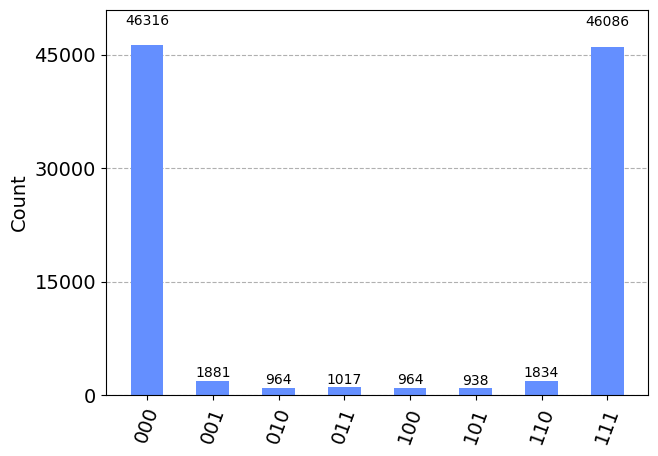

In [4]:
from qiskit_aer.noise import NoiseModel, pauli_error

qc = QuantumCircuit(3, 3)
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)
qc.measure([0, 1, 2], [0, 1, 2])


def create_noise_model(p_err: float) -> NoiseModel:
    """シミュレーション用のカスタムノイズモデルを返す関数"""
    noise_model = NoiseModel()
    bit_flip_err_1_qubit = pauli_error([('X', p_err), ('I', 1 - p_err)])
    bit_flip_err_2_qubit = bit_flip_err_1_qubit.tensor(bit_flip_err_1_qubit)
    noise_model.add_all_qubit_quantum_error(
        error=bit_flip_err_1_qubit,
        instructions=["rz", "sx"]
    )
    noise_model.add_all_qubit_quantum_error(
        error=bit_flip_err_2_qubit,
        instructions=["cx"]
    )
    return noise_model


noise_model = create_noise_model(p_err=0.02)
qc_transpiled = transpile(circuits=qc, basis_gates=noise_model.basis_gates)

shots = 100000
counts = sim.run(qc_transpiled,
                 shots=shots,
                 noise_model=noise_model).result().get_counts()
for bitstring, count in counts.items():
    print(f"Bitstring {bitstring}: "
          f"Actual observation prob. = {np.round(count/shots, 2)}")

plot_histogram(counts)

## 解説
量子ビットとして物理的な量子ビットを想定している限り、環境との相互作用等による量子ビットの汚染すなわち量子エラーは避けられない。Qiskitの`NoiseModel`を使うことで、量子エラーの発生をモデル化し、シミュレーションすることが出来る。量子エラーの発生箇所としては複数箇所検討することができる。ここでは、例としてゲート実行直後のビットフリップのみをモデル化している。具体的には、ネイティブゲートが実行される度に`p_err`の確率でXゲートを作用させる。結果としては、ビットフリップの発生により$|000\rangle$および$|111\rangle$以外の状態が測定される。

以下では簡単な1量子ビットの量子回路と`p_err=0.1`のノイズモデルを用いてノイズモデルの振る舞いをもう少し詳細に確認してみる。

In [5]:
noise_model = create_noise_model(p_err=0.1)
print(noise_model)

qc = QuantumCircuit(1, 1)
qc.x(0)
qc.measure(0, 0)

qc_transpiled = transpile(circuits=qc, basis_gates=noise_model.basis_gates)
display(qc_transpiled.draw())

shots = 100000
counts = sim.run(qc_transpiled,
                 shots=shots,
                 noise_model=noise_model).result().get_counts()
for bitstring, count in counts.items():
    print(f"Bitstring {bitstring}: "
          f"Actual observation prob. = {np.round(count/shots, 2)}")

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['sx', 'cx', 'rz']
  All-qubits errors: ['rz', 'sx', 'cx']


┌────┐┌────┐┌─┐
  q: ┤ √X ├┤ √X ├┤M├
     └────┘└────┘└╥┘
c: 1/═════════════╩═
                  0

Bitstring 0: Actual observation prob. = 0.18
Bitstring 1: Actual observation prob. = 0.82


測定の結果18%の確率でビットフリップが発生していることが分かる。ネイティブゲートであるSXゲートが実行される度に`p_err`の確率でXゲートが実行されるため、回路全体としてビットフリップが発生する確率は`2*p_err*(1-p_err)`から計算できる。`p_err=0.1`の場合にはこの確率は18%となり、測定の結果と一致する。

## 参考資料
- Qiskitチュートリアル https://qiskit.org/documentation/tutorials/simulators/3_building_noise_models.html


# Q13 GHZ状態について、Qiskitの3つのシミュレータ(statevetor_simulator, unitary_simulator, qasm_simulator)を用いた場合のアプトプットの違いを比較せよ。


# Q14 Xを2回作用させるとIとなることを行列計算とゲートの実行で確認せよ。Y, Z, Hについても同様に確認せよ。


# Q15 前問の確認をTとSについても行い、全問との違いを比較せよ。